# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup #
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import pprint


import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data_cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
# cities

613

In [3]:
# cities

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# creating empty lists to fill API data.
city_name=[]
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

In [5]:
def get_weather(city, api_key):
    url = "http://api.openweathermap.org/data/2.5/weather"
    payload = {
        "appid": api_key,
        "q":city
    }
    r = requests.get(url,params=payload)
    if r.status_code == 200:
        return r.json()
    else: 
        return None

In [6]:
all_cities_json = []
for city in cities:
    result = get_weather(city,api_key)
    if result: 
        all_cities_json.append(result)
        

In [7]:
# all json format of cities.
all_cities_json[0:2]

[{'coord': {'lon': 168.86, 'lat': -46.19},
  'weather': [{'id': 804,
    'main': 'Clouds',
    'description': 'overcast clouds',
    'icon': '04d'}],
  'base': 'model',
  'main': {'temp': 285.49,
   'feels_like': 283.15,
   'temp_min': 285.49,
   'temp_max': 285.49,
   'pressure': 1013,
   'humidity': 68,
   'sea_level': 1013,
   'grnd_level': 995},
  'wind': {'speed': 2.22, 'deg': 155},
  'clouds': {'all': 98},
  'dt': 1577158916,
  'sys': {'country': 'NZ', 'sunrise': 1577119820, 'sunset': 1577176619},
  'timezone': 46800,
  'id': 6201424,
  'name': 'Mataura',
  'cod': 200},
 {'coord': {'lon': 139.49, 'lat': -20.73},
  'weather': [{'id': 800,
    'main': 'Clear',
    'description': 'clear sky',
    'icon': '01d'}],
  'base': 'stations',
  'main': {'temp': 316.15,
   'feels_like': 311.42,
   'temp_min': 316.15,
   'temp_max': 316.15,
   'pressure': 1009,
   'humidity': 10},
  'visibility': 10000,
  'wind': {'speed': 5.1, 'deg': 30},
  'clouds': {'all': 0},
  'dt': 1577158916,
  'sys': 

In [27]:
print("Begining Data Retrieval")
print('-'*29)
num = 1
for e in range(len(all_cities_json)):
    city_name.append(all_cities_json[e]['name'])
    country.append(all_cities_json[e]['sys']['country'])
    humidity.append(all_cities_json[e]['main']['humidity'])
    date.append(all_cities_json[e]['dt'])
    cloudiness.append(all_cities_json[e]['clouds']['all'])
    lat.append(all_cities_json[e]['coord']['lat'])
    lng.append(all_cities_json[e]['coord']['lon'])
    max_temp.append(all_cities_json[e]['main']['temp_max'])
    wind_speed.append(all_cities_json[e]['wind']['speed'])
    try:
        print(f"Procssing Record {num} of Set 1 | {cities[e]}")
        num += 1
    except:
        print("City not found. Skipping...")
    continue
    
print('-'*35)
print("Data Retrieval Complete")
print('-'*35)

Begining Data Retrieval
-----------------------------
Procssing Record 1 of Set 1 | mataura
Procssing Record 2 of Set 1 | mount isa
Procssing Record 3 of Set 1 | busselton
Procssing Record 4 of Set 1 | ushuaia
Procssing Record 5 of Set 1 | kiunga
Procssing Record 6 of Set 1 | bredasdorp
Procssing Record 7 of Set 1 | cape town
Procssing Record 8 of Set 1 | punta arenas
Procssing Record 9 of Set 1 | rikitea
Procssing Record 10 of Set 1 | kapaa
Procssing Record 11 of Set 1 | hakvik
Procssing Record 12 of Set 1 | kota kinabalu
Procssing Record 13 of Set 1 | jamestown
Procssing Record 14 of Set 1 | atuona
Procssing Record 15 of Set 1 | torbay
Procssing Record 16 of Set 1 | temaraia
Procssing Record 17 of Set 1 | faanui
Procssing Record 18 of Set 1 | port hedland
Procssing Record 19 of Set 1 | bairiki
Procssing Record 20 of Set 1 | vao
Procssing Record 21 of Set 1 | taolanaro
Procssing Record 22 of Set 1 | okhotsk
Procssing Record 23 of Set 1 | port hawkesbury
Procssing Record 24 of Set 1 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
weather_dict ={
    "City": city_name,
    "Country":country,
    "Date":date,
    "Humidity":humidity,
    "Lat":lat,
    "Lng":lng,
    "Max Temp": max_temp,
    "Wind Speed":wind_speed,
    "Cloudiness":cloudiness
}

In [10]:
weather_df = pd.DataFrame(weather_dict)
weather_df.head()

,City,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,Cloudiness
0,Mataura,NZ,1577158916,68,-46.19,168.86,285.49,2.22,98
1,Mount Isa,AU,1577158916,10,-20.73,139.49,316.15,5.10,0
2,Busselton,AU,1577158917,20,-33.64,115.35,305.37,3.59,0
3,Ushuaia,AR,1577158917,86,-54.81,-68.31,278.15,2.10,20
4,Kiunga,PG,1577158917,69,-6.12,141.30,304.90,1.05,48


In [11]:
weather_df.count()

City          544
Country       544
Date          544
Humidity      544
Lat           544
Lng           544
Max Temp      544
Wind Speed    544
Cloudiness    544
dtype: int64

In [12]:
# save the weather_df to 
weather_df.to_csv(output_data_file)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [13]:
weather_Max_f = (weather_df["Max Temp"]-273.15)*(9/5)+32
# (278K − 273.15) × 9/5 + 32

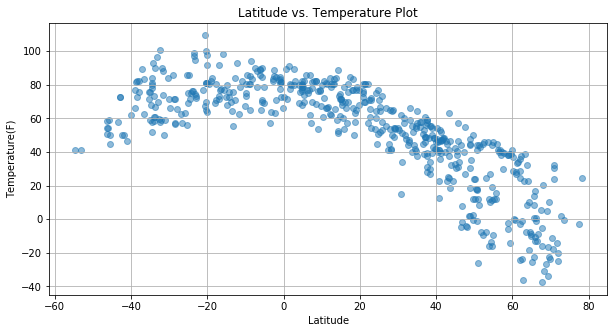

In [26]:
plt.figure(figsize=(10,5))
plt.title('Latitude vs. Temperature Plot')
plt.scatter(weather_df['Lat'],weather_Max_f, marker = "o",alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Temperature"+'(F)')
plt.grid(True)
plt.show()

#### Latitude vs. Humidity Plot

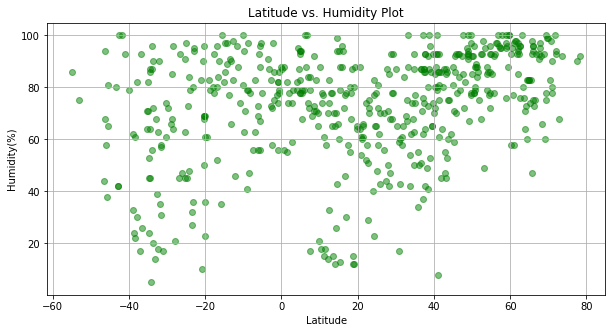

In [25]:
plt.figure(figsize=(10,5))
plt.title('Latitude vs. Humidity Plot')
plt.scatter(weather_df['Lat'],weather_df['Humidity'], marker = "o",alpha=.5, color="g")
plt.xlabel("Latitude")
plt.ylabel("Humidity"+'(%)')
plt.grid(True)
plt.show()

#### Latitude vs. Cloudiness Plot

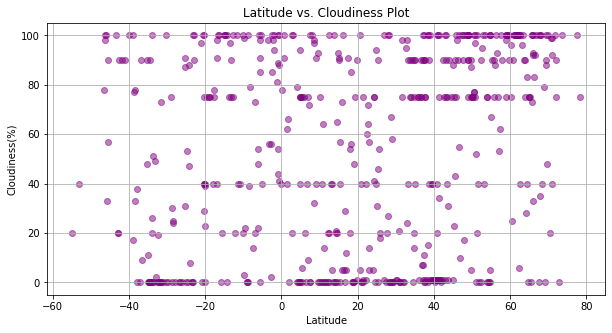

In [29]:
plt.figure(figsize=(10,5))
plt.title('Latitude vs. Cloudiness Plot')
plt.scatter(weather_df['Lat'],weather_df['Cloudiness'], marker = "o", alpha=.5,color='purple')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness"+'(%)')
plt.grid(True)
plt.show()

#### Latitude vs. Wind Speed Plot

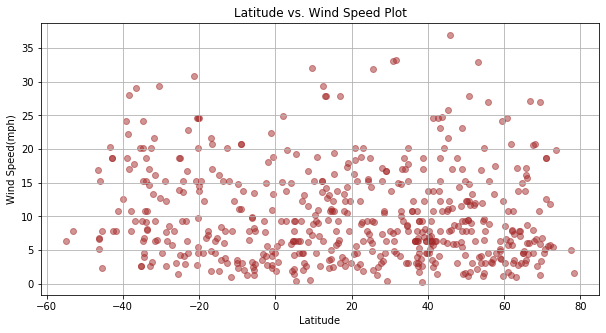

In [30]:

plt.figure(figsize=(10,5))
plt.title('Latitude vs. Wind Speed Plot')
plt.scatter(weather_df['Lat'],(weather_df['Wind Speed']*3), marker = "o",alpha=.5, color='brown')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed"+'(mph)')
plt.grid(True)
plt.show()

In [ ]:
# 3 obsarvations need to be written as well.